In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [6]:
df=pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [7]:
# Checking the dimensions of dataset
df.shape

(7752, 25)

In [8]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [11]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [12]:
# Converting Date column from object to datetime
df["Date"]= pd.to_datetime(df["Date"])

# Extracting day, month and year from Date column
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [13]:
# Dropping "Date" column
df.drop("Date",axis=1,inplace=True)

In [14]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0


In [15]:
# Checking the null values in the dataframe
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

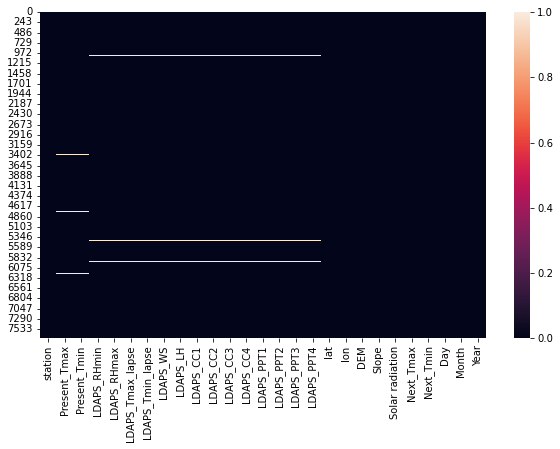

In [16]:
# Lets visualize the null values clearly
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()


In [17]:
# Checking unique values in station column
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

From the dataset we can notice that there are 25 stations and the data is collected from each station everyday starts from 1 ends at 25th station and the process is repeating.


By checking the unique values we can say that the station column has missing values in the last two records i.e the null values in station column is present after 25th. So we will replace the null values by considering it as a next day.

# Treating null values

In [18]:
# Filling null values in "station" column
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

In [20]:
df.Day = df.Day.fillna(0)
df.Month = df.Month.fillna(0)
df.Year = df.Year.fillna(0)

In [21]:
# Checking skewness
df.skew()

station              0.000182
Present_Tmax        -0.262942
Present_Tmin        -0.365875
LDAPS_RHmin          0.298765
LDAPS_RHmax         -0.850870
LDAPS_Tmax_lapse    -0.226775
LDAPS_Tmin_lapse    -0.578943
LDAPS_WS             1.571581
LDAPS_LH             0.670491
LDAPS_CC1            0.457231
LDAPS_CC2            0.470060
LDAPS_CC3            0.637630
LDAPS_CC4            0.663251
LDAPS_PPT1           5.367675
LDAPS_PPT2           5.747360
LDAPS_PPT3           6.425829
LDAPS_PPT4           6.792379
lat                  0.087062
lon                 -0.285213
DEM                  1.723257
Slope                1.563020
Solar radiation     -0.511210
Next_Tmax           -0.339607
Next_Tmin           -0.403743
Day                  0.244656
Month               -0.708304
Year               -62.067548
dtype: float64

The columnsLDAPS_RHmax, LDAPS_Tmin_Lapse, LDAPS_WS, LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PP2,LDAPS_PPT3 and LDAPS_PPT4 have skewness which means the data is not symmetric also the outliers are present in those column. So we will use median method to fill the null values in those columns.


For the remaining columns we will use mean value to fill the null values.

In [22]:
# Checking the mean values of the column
print("The mean of Present_Tmax is:",df['Present_Tmax'].mean())
print("The mean of Present_Tmin is:",df['Present_Tmin'].mean())
print("The mean of LDAPS_RHmin is:",df['LDAPS_RHmin'].mean())
print("The mean of LDAPS_Tmax_lapse is:",df['LDAPS_Tmax_lapse'].mean())
print("The mean of LDAPS_CC1 is:",df['LDAPS_CC1'].mean())
print("The mean of LDAPS_CC2 is:",df['LDAPS_CC2'].mean())
print("The mean of Next_Tmax is:",df['Next_Tmax'].mean())
print("The mean of Next_Tmin is:",df['Next_Tmin'].mean())

The mean of Present_Tmax is: 29.76821140328037
The mean of Present_Tmin is: 23.22505857849521
The mean of LDAPS_RHmin is: 56.75937215069287
The mean of LDAPS_Tmax_lapse is: 29.613446542813577
The mean of LDAPS_CC1 is: 0.36877358559828194
The mean of LDAPS_CC2 is: 0.35608043728396527
The mean of Next_Tmax is: 30.274886731391593
The mean of Next_Tmin is: 22.93222006472492


In [23]:
# Filling missing values in thr above columns using mean method
cols = ["Present_Tmax","Present_Tmin","LDAPS_RHmin","LDAPS_Tmax_lapse","LDAPS_CC1","LDAPS_CC2","Next_Tmax","Next_Tmin"]
for i in cols:
    df[i] = df[i].replace(np.nan,df[i].mean())

In [24]:
# Checking the median values of the columns having outliers
print("The median of LDAPS_RHmax is :",df["LDAPS_RHmax"].median())
print("The median of LDAPS_Tmin_lapse is :",df["LDAPS_Tmin_lapse"].median())
print("The median of LDAPS_WS is :",df["LDAPS_WS"].median())
print("The median of LDAPS_LH is :",df["LDAPS_LH"].median())
print("The median of LDAPS_CC3 is :",df["LDAPS_CC3"].median())
print("The median of LDAPS_CC4 is :",df["LDAPS_CC4"].median())
print("The median of LDAPS_PPT1 is :",df["LDAPS_PPT1"].median())
print("The median of LDAPS_PPT2 is :",df["LDAPS_PPT2"].median())
print("The median of LDAPS_PPT3 is :",df["LDAPS_PPT3"].median())
print("The median of LDAPS_PPT4 is :",df["LDAPS_PPT4"].median())

The median of LDAPS_RHmax is : 89.79347992
The median of LDAPS_Tmin_lapse is : 23.76019884
The median of LDAPS_WS is : 6.547470301
The median of LDAPS_LH is : 56.86548154
The median of LDAPS_CC3 is : 0.262554604
The median of LDAPS_CC4 is : 0.227664469
The median of LDAPS_PPT1 is : 0.0
The median of LDAPS_PPT2 is : 0.0
The median of LDAPS_PPT3 is : 0.0
The median of LDAPS_PPT4 is : 0.0


In [25]:
# Filling missing values in the above columns using median method
cols = ["LDAPS_RHmax","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"]
for i in cols:
    df[i] = df[i].replace(np.nan,df[i].median())

In [26]:
# Checking null values again
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

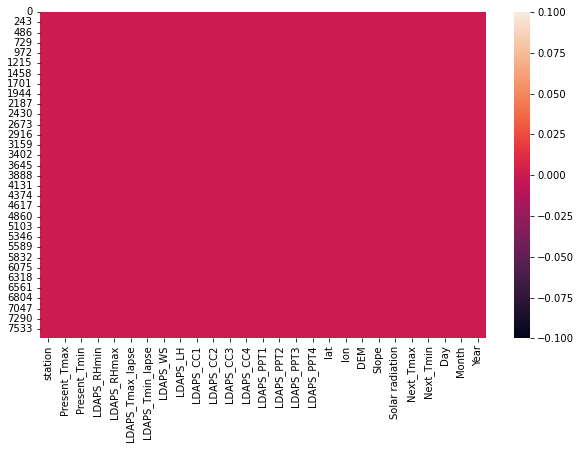

In [27]:
# Lets visualize the null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()


In [28]:
# Checking the number of unique values in each column
df.nunique()

station               25
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
Day                   22
Month                 13
Year                   6
dtype: int64

In [29]:
# statistical Summary of dataset
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.997033,29.768211,23.225059,56.759372,88.388529,29.613447,23.514984,7.092549,62.450457,0.368774,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,16.366744,7.078818,2014.480134
std,7.213007,2.956557,2.403036,14.596973,7.158471,2.932898,2.334099,2.173913,33.571540,0.261185,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,8.244461,2.240962,32.394355
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,0.000000,0.000000,0.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.313244,89.793480,29.662273,23.760199,6.547470,56.865482,0.320110,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


The counts of the columns are same which means there are no missing values present in the dataset.

In most of the columns, mean is greater than the median(50%),which means theey are skewed to the right.

Some column like LDAPS_RHmax, Solar radiation etc, have median values bit greater than the mean value i.e they are skewed to the left

Also the columns like station, present_Tmax, lon, lat have same mean and median values which means he dat is normal and symmetric, also they have no skewness.

There is a huge difference between the 75th percentile and max, so outliers are present.

# Data Visualization

In [30]:
#Univariate Analysis

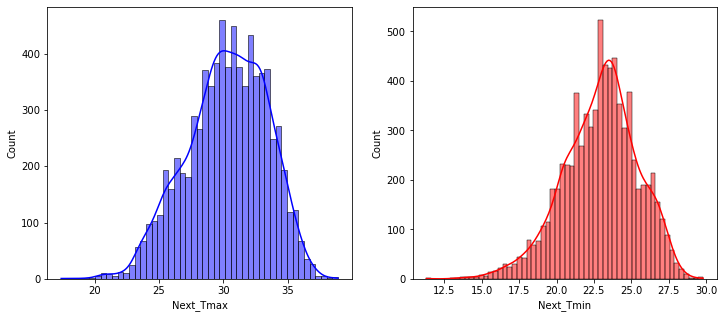

In [31]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

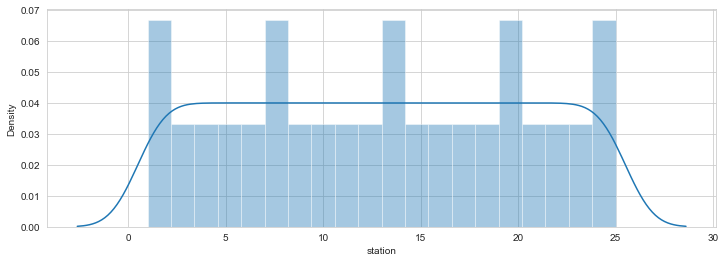

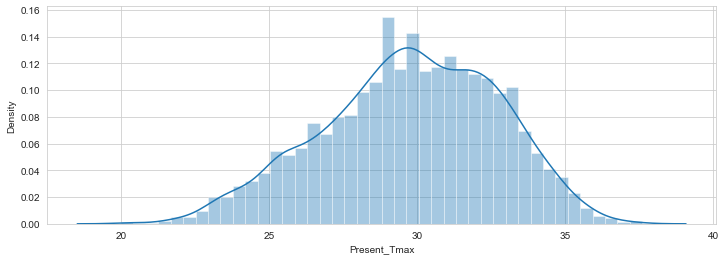

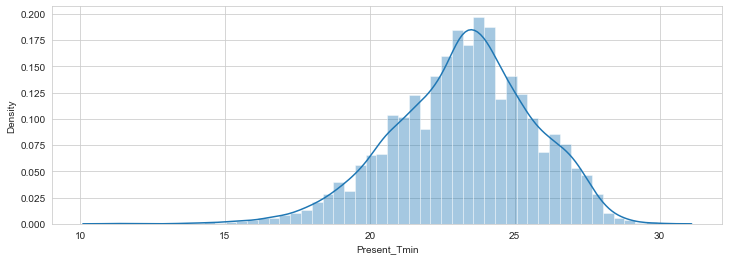

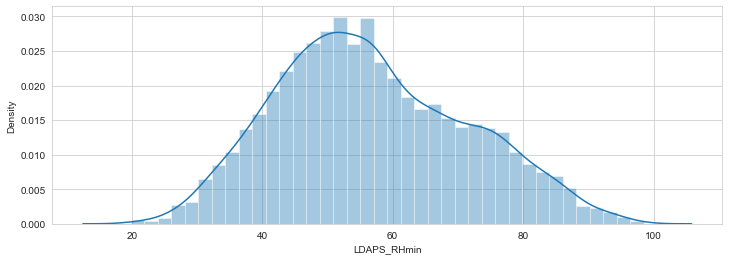

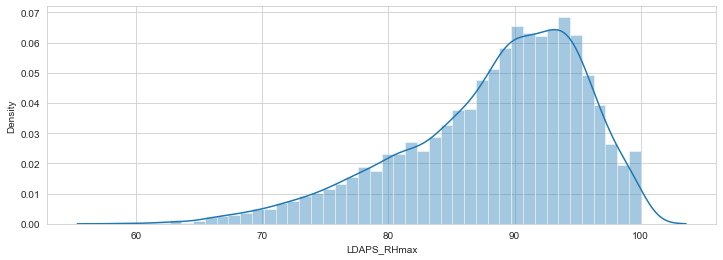

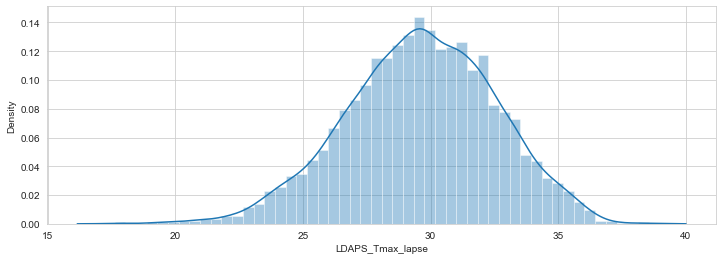

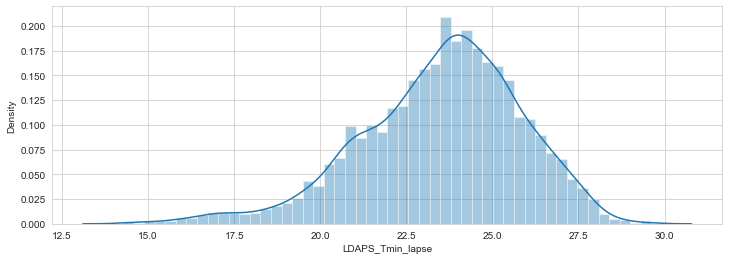

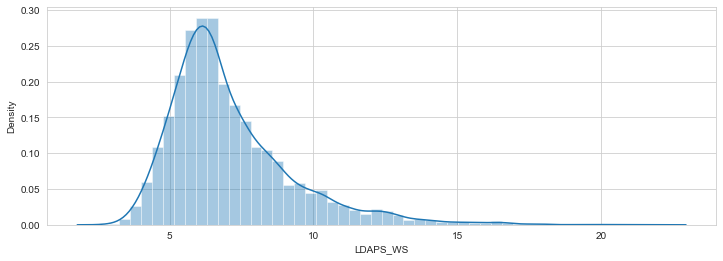

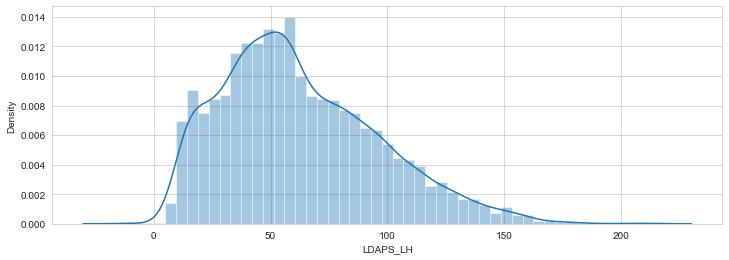

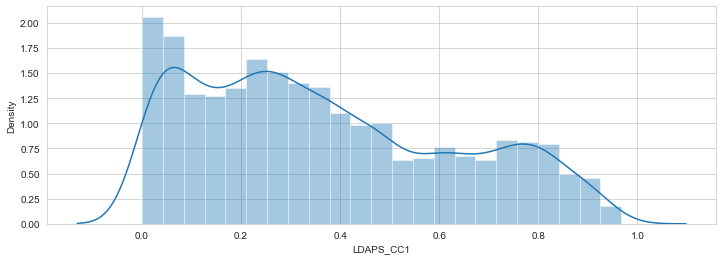

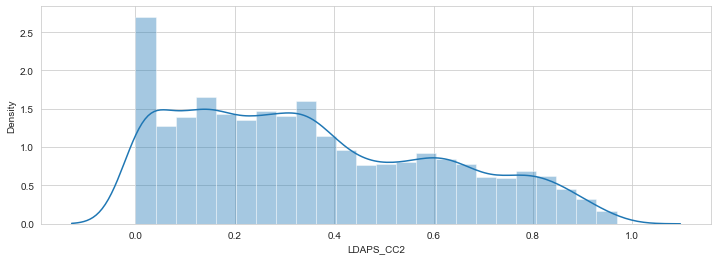

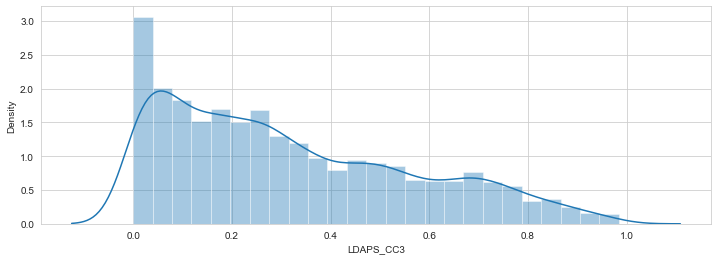

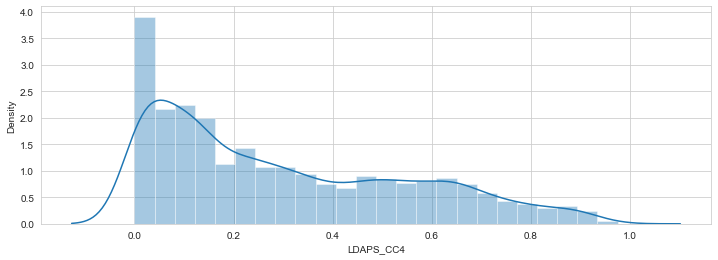

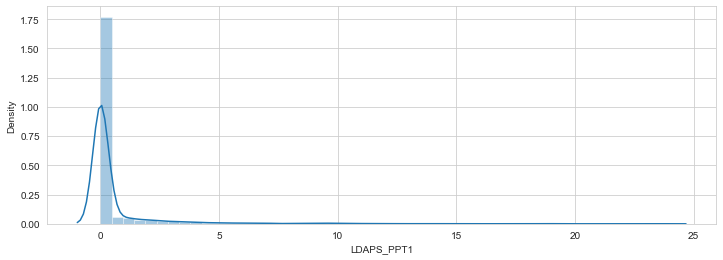

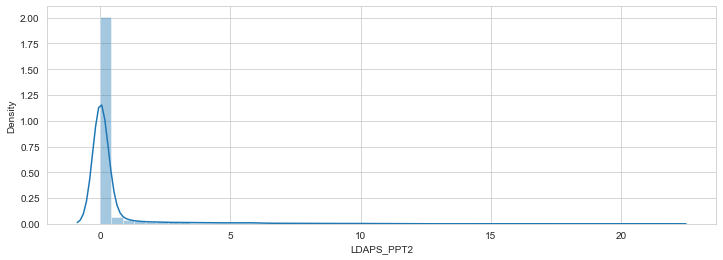

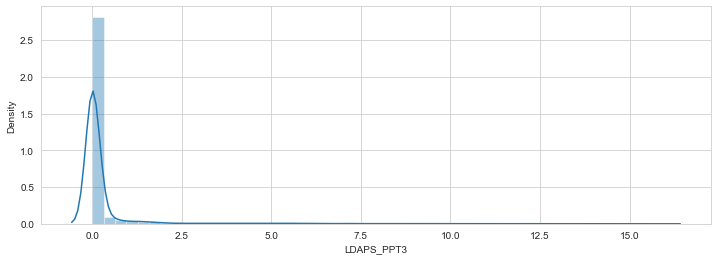

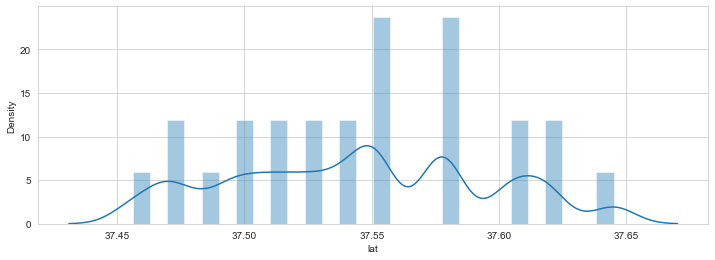

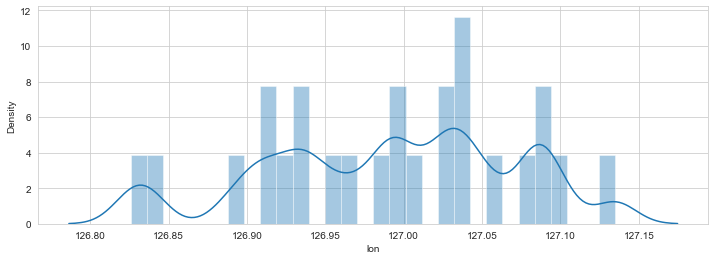

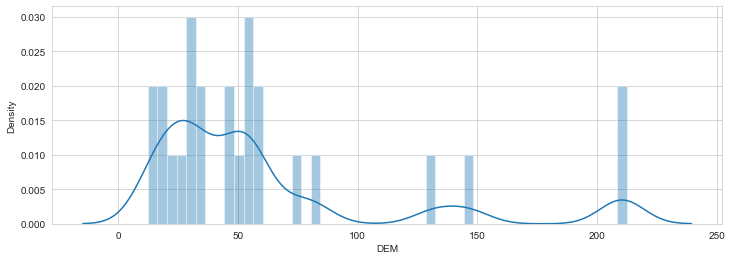

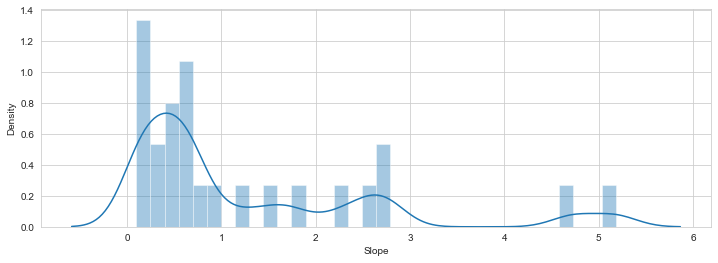

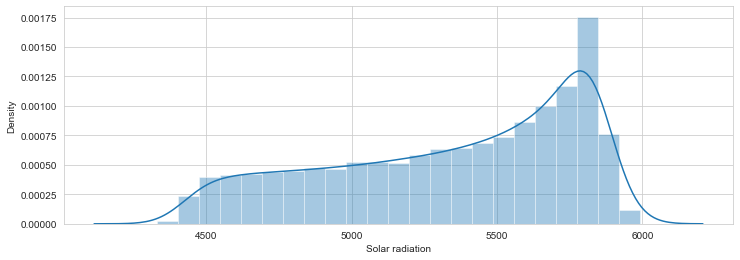

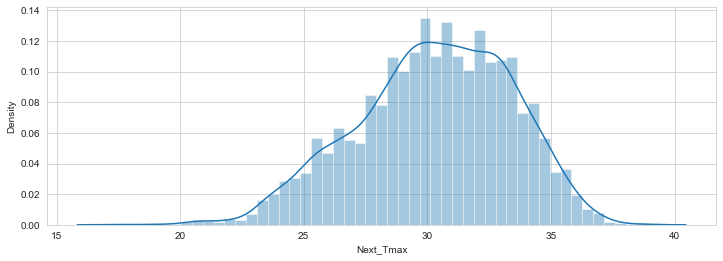

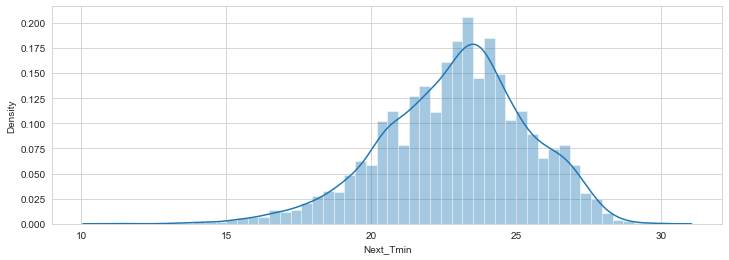

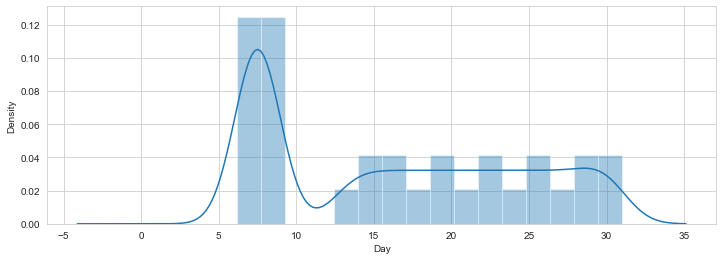

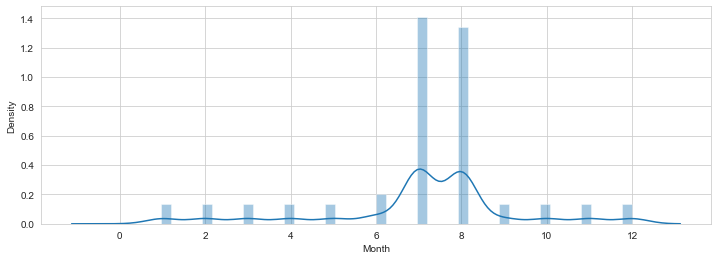

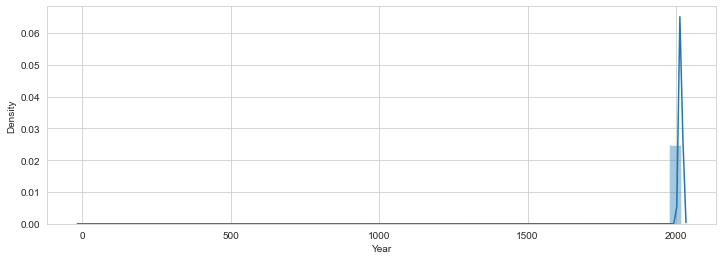

In [32]:
# Creating a list of columns having kde bandwidth more than  so that they can be visulaized.

abs_num = df[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year']]



# Visualizing the distribution of columns using distribution plot.

for i in abs_num.columns:
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,4))
    x = sns.distplot(abs_num[i])
    plt.show()

observation
we can see that many features are positively skewed some are normally distibuted and some are skewed left. which means that outlier need to be treated

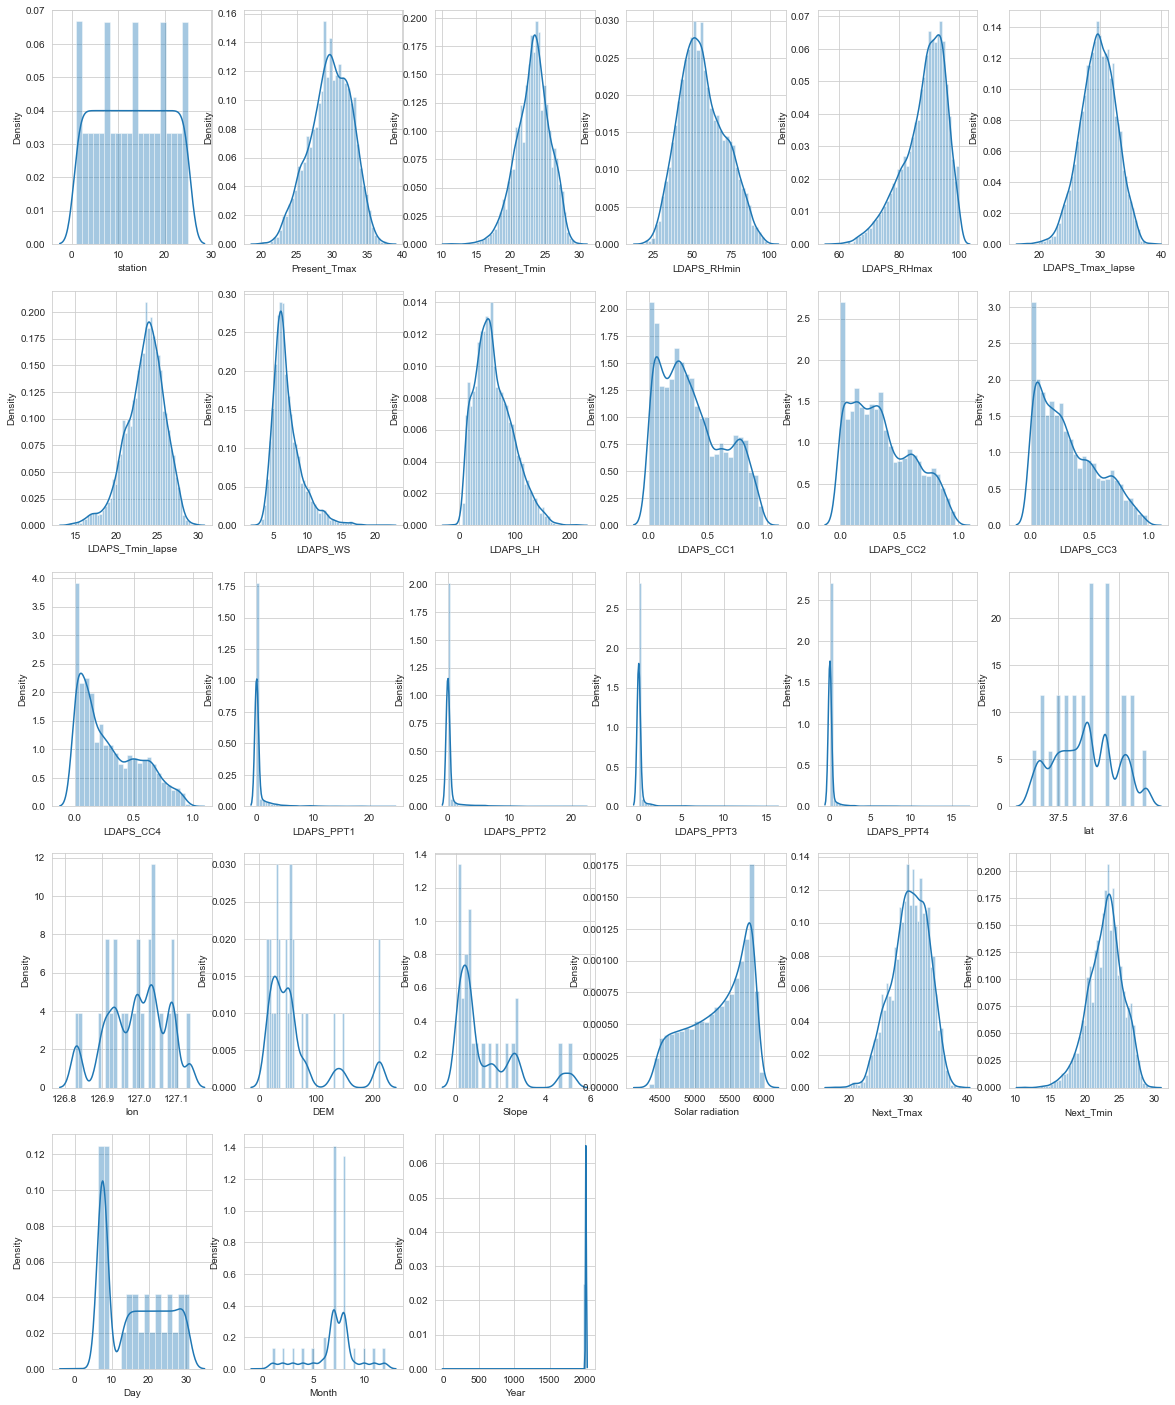

In [33]:
#lets see how our data point are distributed
plt.figure(figsize=(20,25),facecolor = 'w')
plotnumber = 1

for column in df:
    if plotnumber<=27:
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

# Bivariate Analysis

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

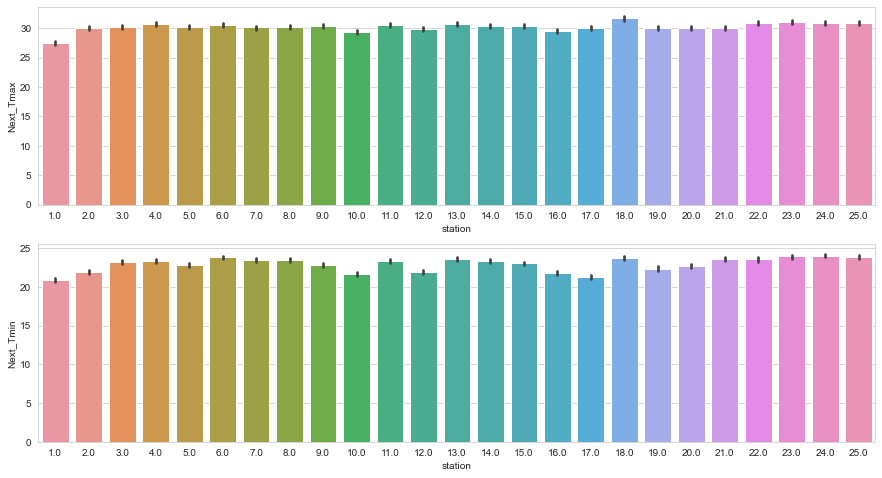

In [38]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.barplot(df['station'],df['Next_Tmax'],data=df)
plt.subplot(2,1,2)
sns.barplot(df['station'],df['Next_Tmin'],data=df)

From the box plot we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets while station 1 observes lowest temperature for both the targets. This could be because of the stations location

<AxesSubplot:title={'center':'Next day min temperature Vs Present day max temperature'}, xlabel='Present_Tmin', ylabel='Next_Tmax'>

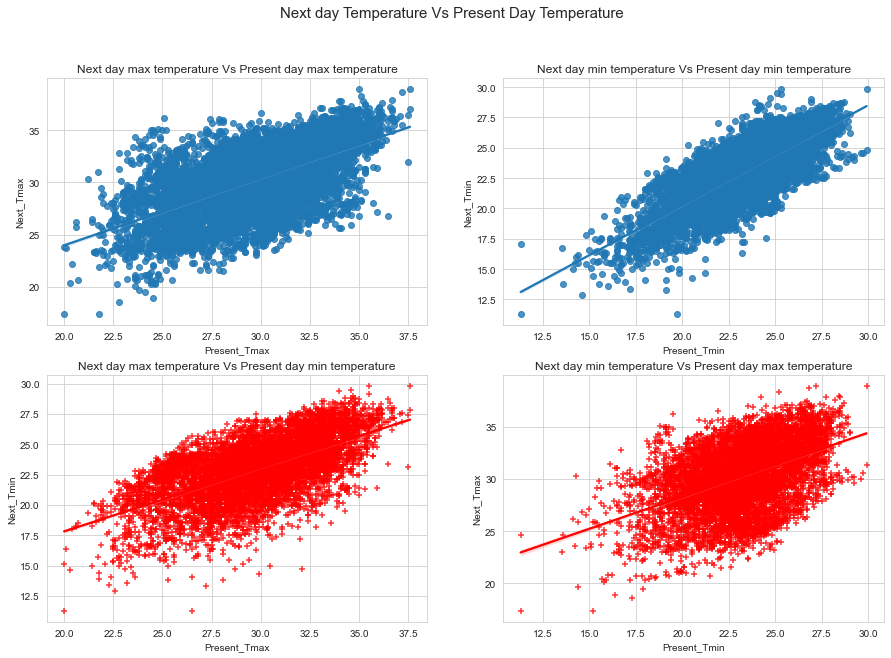

In [40]:
# Comparing Next day temperature and Present day temperature

plt.figure(figsize=(15,10))
plt.suptitle("Next day Temperature Vs Present Day Temperature",fontsize=15)

plt.subplot(2,2,1)
plt.title("Next day max temperature Vs Present day max temperature")
sns.regplot(x="Present_Tmax",y = "Next_Tmax",data=df)

plt.subplot(2,2,2)
plt.title("Next day min temperature Vs Present day min temperature")
sns.regplot(x="Present_Tmin",y = "Next_Tmin",data=df)

plt.subplot(2,2,3)
plt.title("Next day max temperature Vs Present day min temperature")
sns.regplot(x="Present_Tmax",y = "Next_Tmin",data=df,marker="+",color="r")

plt.subplot(2,2,4)
plt.title("Next day min temperature Vs Present day max temperature")
sns.regplot(x="Present_Tmin",y = "Next_Tmax",data=df,marker="+",color='r')

we can observe positive relation between preset day and next day column

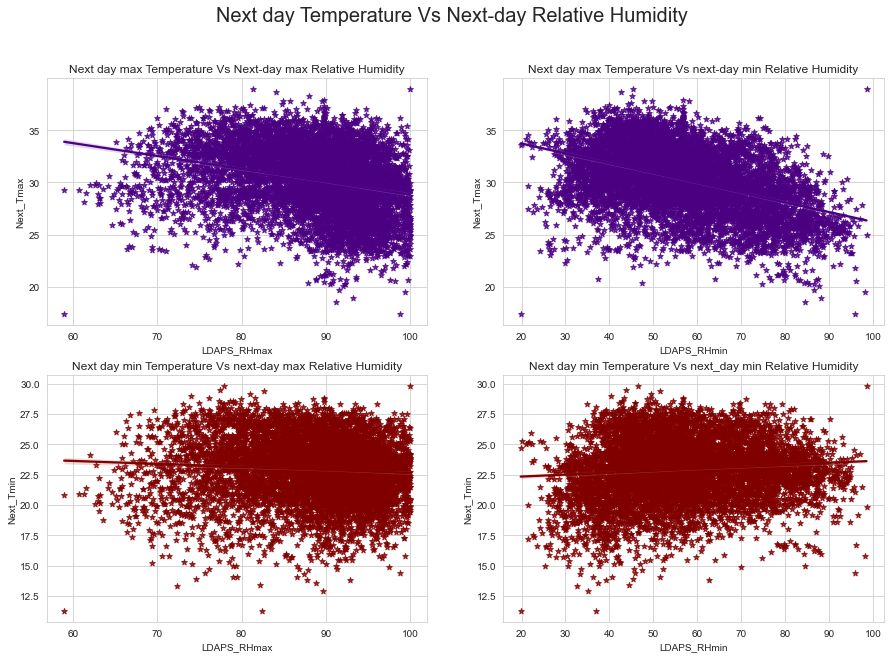

In [41]:
# Comparing Next day temperature and next day Relative Humidity

plt.figure(figsize=(15,10))
plt.suptitle('Next day Temperature Vs Next-day Relative Humidity',fontsize=20)

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmax',data=df,marker="*",color='indigo')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmax',data=df,marker="*",color='indigo')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmin',data=df,marker="*",color='maroon')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmin',data=df,marker="*",color="maroon")
plt.show()

Next day Tmax decreases with increase in LDAPS_RHmax and LDAPS_RHmin but it is not true in case of Next_Tmin, as Next day Tmin seems to be unaffected by RHmax and we can also observe slight positive correlation between Next_Tmin and RHmin.

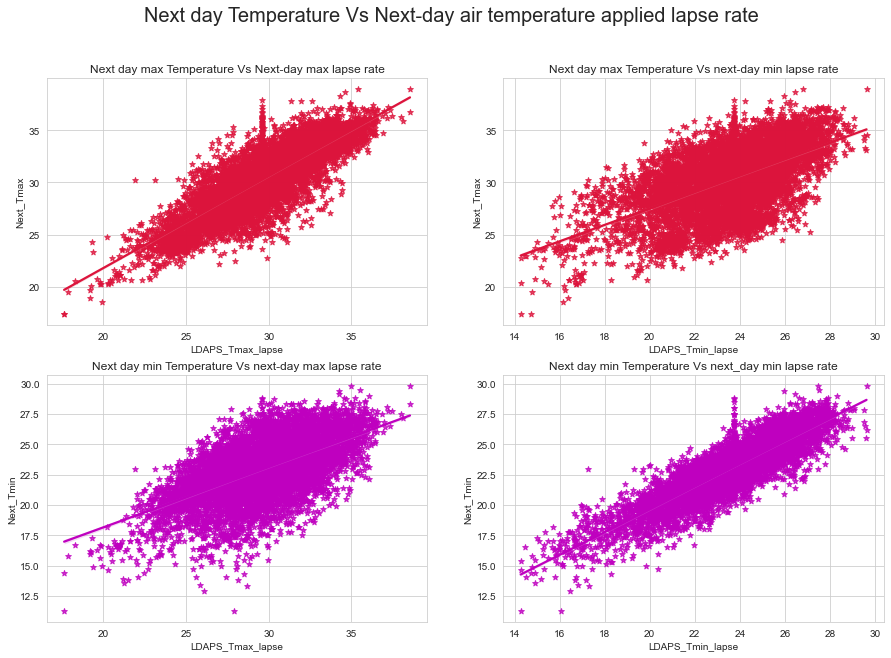

In [42]:
# Comparing Next day temperature and next day air temperature applied lapse rate (Â°C)

plt.figure(figsize=(15,10))
plt.suptitle('Next day Temperature Vs Next-day air temperature applied lapse rate',fontsize=20)

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day max lapse rate')
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df,marker="*",color='crimson')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day min lapse rate')
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmax',data=df,marker="*",color='crimson')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day max lapse rate')
sns.regplot(x='LDAPS_Tmax_lapse',y='Next_Tmin',data=df,marker="*",color='m')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day min lapse rate')
sns.regplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df,marker="*",color="m")
plt.show()

positive relation 

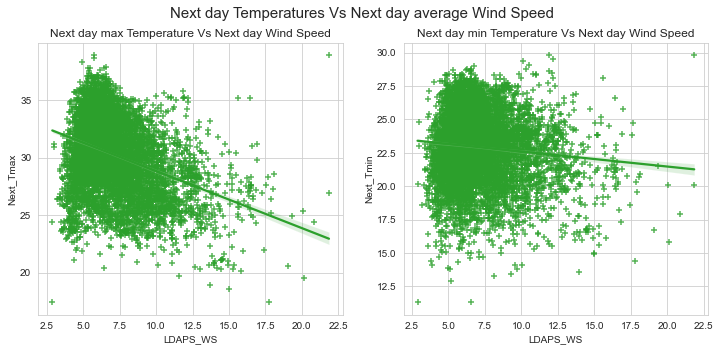

In [43]:
# Comparing Next day temperature and  Next day Average Wind Speed

plt.figure(figsize=(12,5))
plt.suptitle('Next day Temperatures Vs Next day average Wind Speed',fontsize=15)

plt.subplot(1,2,1)
plt.title('Next day max Temperature Vs Next day Wind Speed') 
sns.regplot(x='LDAPS_WS',y='Next_Tmax',data=df,marker='+',color="tab:green")

plt.subplot(1,2,2)
plt.title('Next day min Temperature Vs Next day Wind Speed') 
sns.regplot(x='LDAPS_WS',y='Next_Tmin',data=df,marker='+',color="tab:green")
plt.show()

There is very less relation of wind speed with the target variables. As wind speed increases, Next day temperature decreases also Next day Tmax seems to decrease more drastically compared to Next day Tmin.

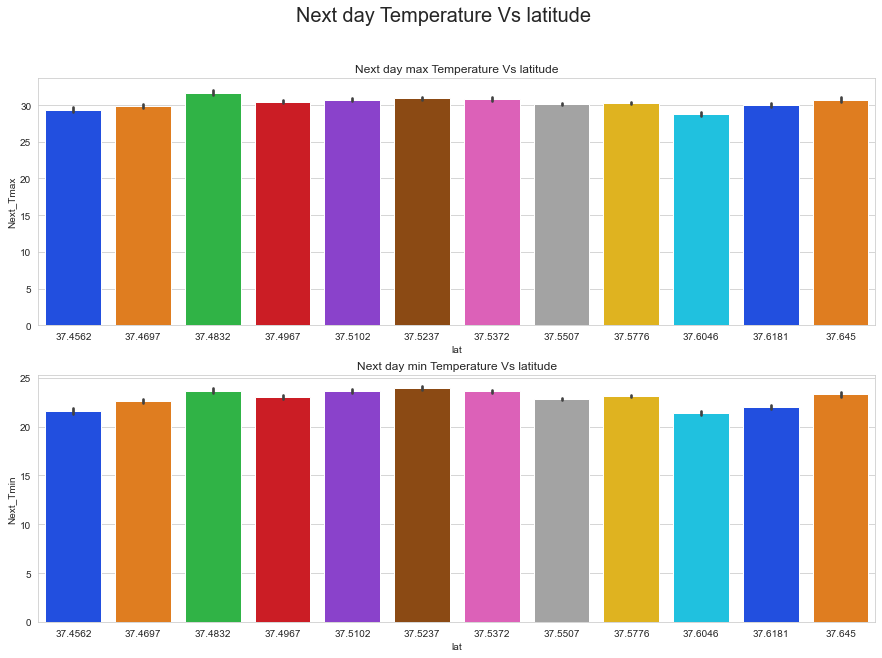

In [44]:
# Comparing Next day temperature and latitude

plt.figure(figsize=(15,10))
plt.suptitle('Next day Temperature Vs latitude',fontsize=20)

plt.subplot(2,1,1)
plt.title('Next day max Temperature Vs latitude')
sns.barplot(x='lat',y='Next_Tmax',data=df,palette="bright")

plt.subplot(2,1,2)
plt.title('Next day min Temperature Vs latitude')
sns.barplot(x='lat',y='Next_Tmin',data=df,palette="bright")
plt.show()

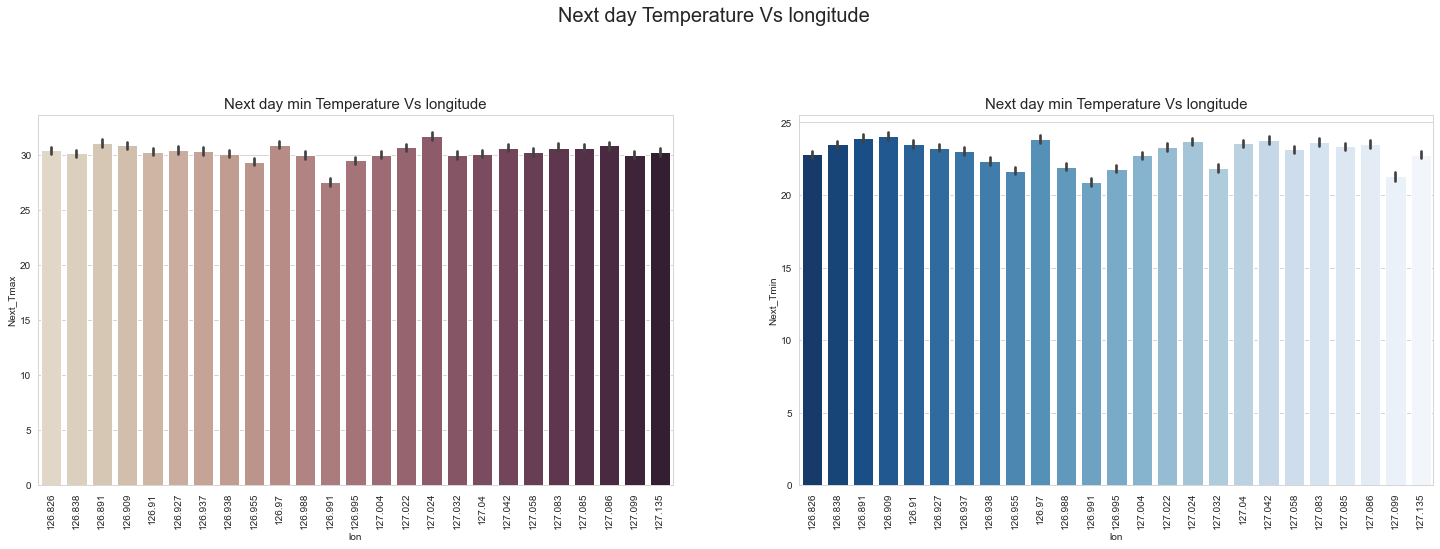

In [45]:
plt.figure(figsize=(25,15))
plt.suptitle('Next day Temperature Vs longitude',fontsize=20)

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs longitude',fontsize=15)
sns.barplot(x='lon',y='Next_Tmax',data=df,palette="ch:.28")
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs longitude',fontsize=15)
sns.barplot(x='lon',y='Next_Tmin',data=df,palette="Blues_r")
plt.xticks(rotation=90)
plt.show()

From the graph we can say that longitude is not affecting much Next day temperature. As the longitude increases, Next_Tmax also increases for first three longitudes and then it decreases. This increase and decrease continuous tll the end.

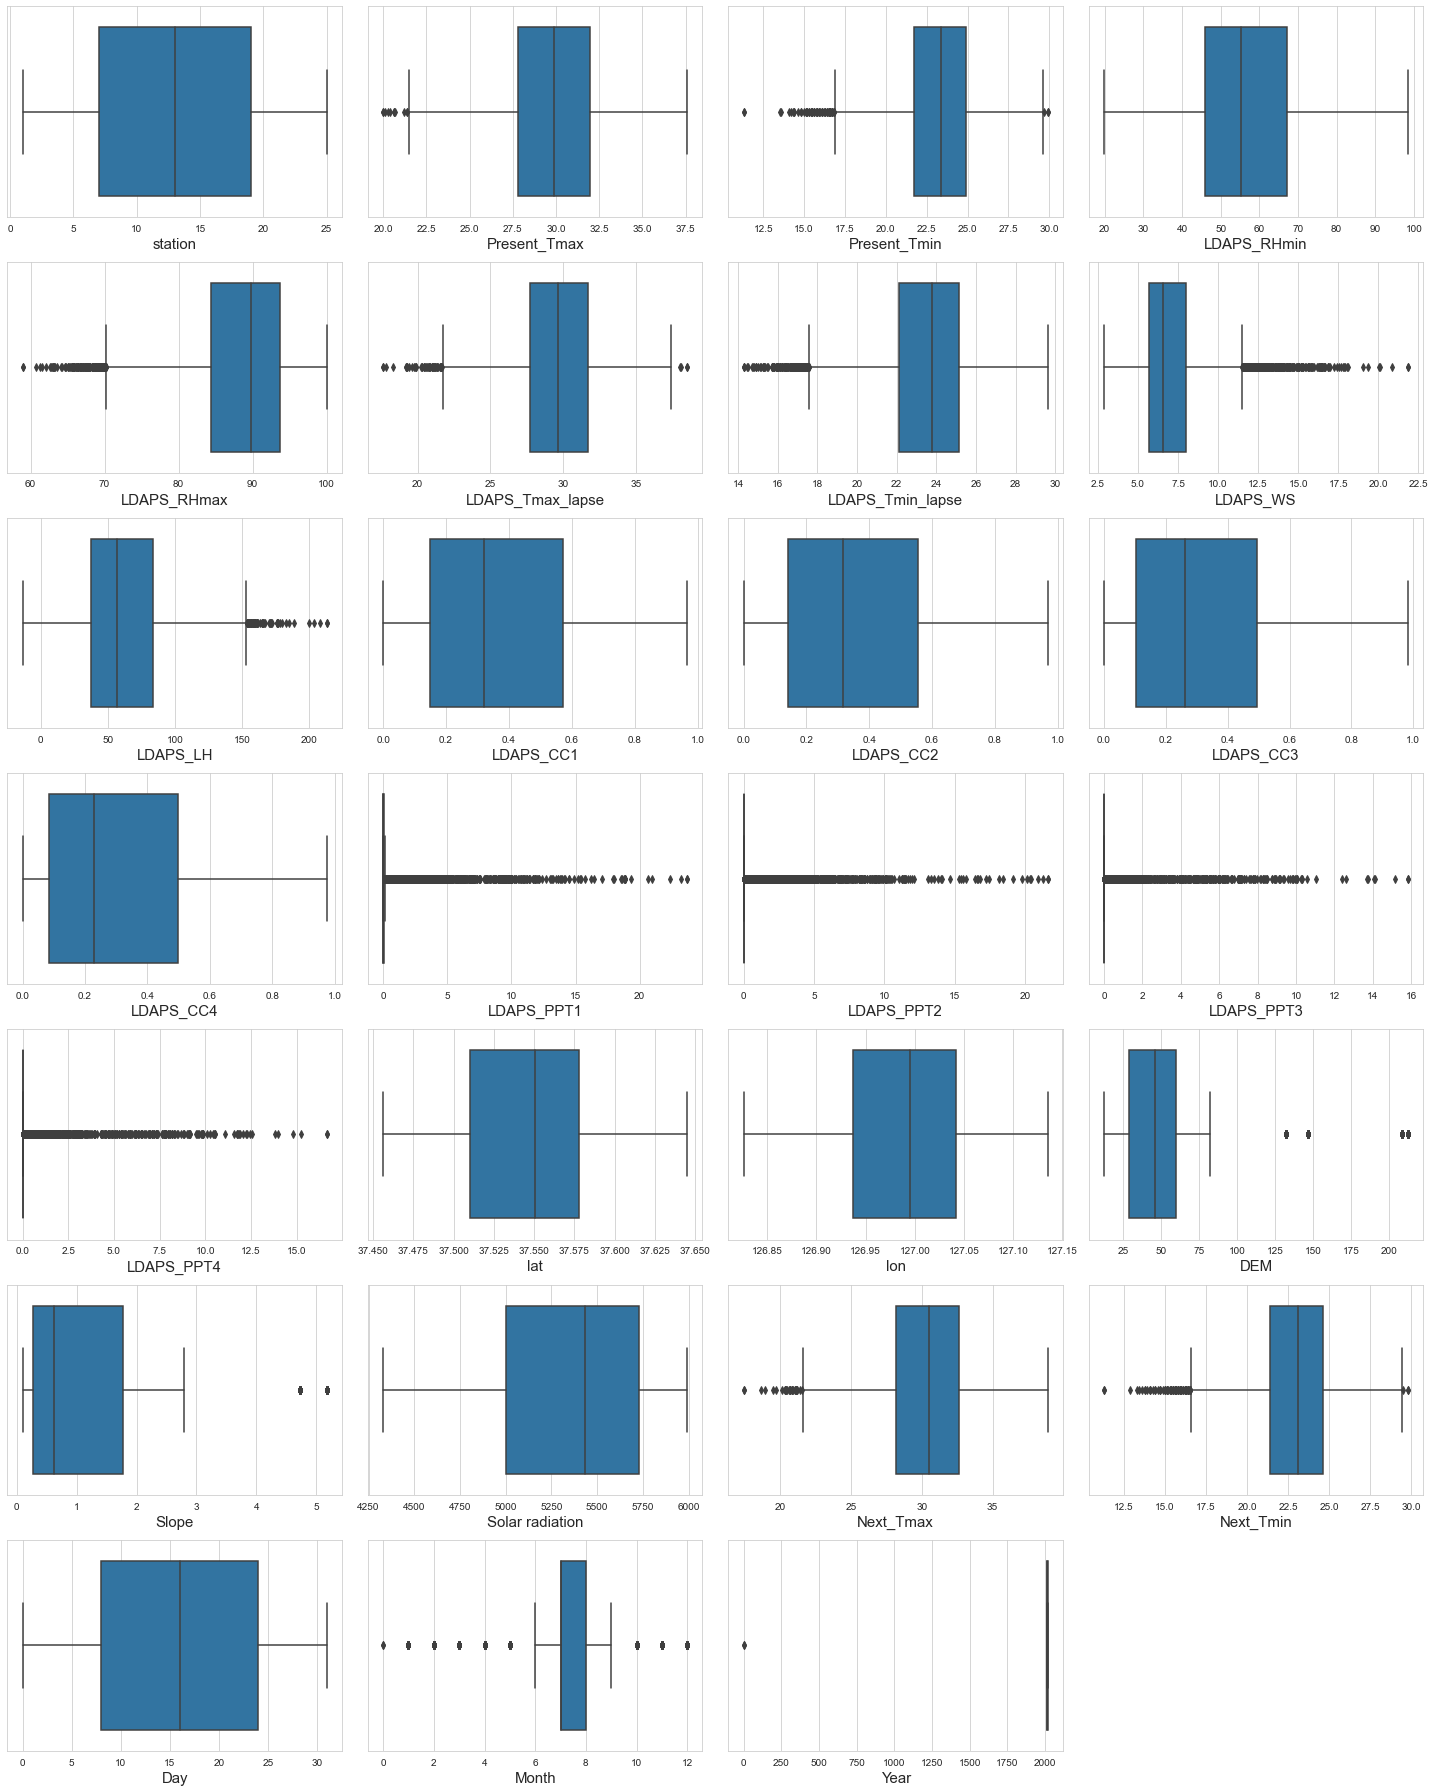

In [46]:
# Checking for outliers present in the dataset
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for col in df.columns:
    if plotnumber<=27:
        ax = plt.subplot(7,4,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [47]:
#removing outlier using zscore method.

# Features containing outliers
features = df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Month']]
from scipy.stats import zscore
z = np.abs(zscore(features))
z

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Month
0,0.361326,0.759529,0.381088,0.524889,0.217678,0.125893,0.208564,0.302656,0.273714,0.238242,0.222227,2.772243,1.115004,0.481440
1,0.721084,0.676296,0.309610,0.080895,0.222809,0.644345,0.313173,0.302656,0.273714,0.238242,0.222227,0.315157,0.542158,0.481440
2,0.619608,0.031188,0.616784,0.162936,0.450160,0.439018,1.247488,0.302656,0.273714,0.238242,0.222227,0.526218,0.723133,0.481440
3,0.754909,0.072805,1.130923,0.031092,0.080896,0.663593,0.097609,0.302656,0.273714,0.238242,0.222227,0.297588,0.932424,0.481440
4,0.551957,0.551446,0.246800,0.170325,0.012213,0.624511,1.355851,0.302656,0.273714,0.238242,0.222227,0.494322,0.548433,0.481440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,2.187892,2.549048,1.329793,1.112066,2.030596,0.434099,0.286208,0.302656,0.273714,0.238242,0.222227,0.852681,0.803915,0.411092
7748,2.187892,2.299348,1.549810,0.887662,2.048660,0.252892,0.453062,0.302656,0.273714,0.238242,0.222227,0.821213,0.755095,0.411092
7749,2.221718,2.424198,1.556967,0.570780,2.138873,0.090494,1.589557,0.302656,0.273714,0.238242,0.222227,0.779043,0.719338,0.411092
7750,3.304127,4.962817,4.114586,4.087857,3.959959,1.936712,2.265567,0.302656,0.273714,0.238242,0.222227,0.911963,0.845455,3.159033


In [48]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30.0,8.0,2017.0


In [51]:
new_df.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax        -0.691582
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS            1.095290
LDAPS_LH            0.571067
LDAPS_CC1           0.593987
LDAPS_CC2           0.501474
LDAPS_CC3           0.709766
LDAPS_CC4           0.721344
LDAPS_PPT1          3.753955
LDAPS_PPT2          4.874124
LDAPS_PPT3          5.517553
LDAPS_PPT4          5.974954
lat                 0.106291
lon                -0.276193
DEM                 1.761452
Slope               1.592353
Solar radiation    -0.503706
Next_Tmax          -0.270276
Next_Tmin          -0.293914
Day                 0.252759
Month              -0.684769
Year                0.008778
dtype: float64

In [54]:
# Checking the correlation between features and label
cor = new_df.corr()
cor


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.110201,0.132716,-0.067644,-0.171526,0.066611,0.104061,0.020232,-0.135128,0.009327,...,-0.239847,-0.121894,-0.257797,-0.095913,-0.028687,0.106915,0.128760,0.005555,0.001801,0.005481
Present_Tmax,0.110201,1.000000,0.614395,-0.149083,-0.289483,0.535406,0.611486,-0.108611,0.125742,-0.284372,...,-0.049950,0.010636,-0.170075,-0.093092,-0.061748,0.587102,0.615886,-0.127836,0.024103,0.101835
Present_Tmin,0.132716,0.614395,1.000000,0.153622,-0.031547,0.436104,0.756522,0.013081,-0.009763,0.092169,...,-0.071011,-0.044785,-0.241957,-0.139978,0.015594,0.448868,0.786074,-0.072259,-0.013204,0.095206
LDAPS_RHmin,-0.067644,-0.149083,0.153622,1.000000,0.553513,-0.552112,0.135865,0.239561,-0.039828,0.576662,...,0.088452,-0.095040,0.094075,0.118109,0.252285,-0.424992,0.139054,-0.072383,-0.073083,-0.000415
LDAPS_RHmax,-0.171526,-0.289483,-0.031547,0.553513,1.000000,-0.384158,-0.134150,0.096015,0.268954,0.412510,...,0.198735,0.016600,0.170540,0.216046,0.154460,-0.295002,-0.087027,-0.010859,-0.047941,-0.140533
LDAPS_Tmax_lapse,0.066611,0.535406,0.436104,-0.552112,-0.384158,1.000000,0.620489,-0.232992,0.035547,-0.415694,...,-0.036970,0.102265,-0.164826,-0.151068,0.015199,0.806117,0.546807,-0.142456,-0.011455,0.060688
LDAPS_Tmin_lapse,0.104061,0.611486,0.756522,0.135865,-0.134150,0.620489,1.000000,-0.055160,-0.138550,0.041120,...,-0.088831,-0.030814,-0.180092,-0.174643,0.111543,0.541630,0.869504,-0.147928,-0.020421,0.042309
LDAPS_WS,0.020232,-0.108611,0.013081,0.239561,0.096015,-0.232992,-0.055160,1.000000,-0.044771,0.262082,...,-0.013570,-0.075279,0.153758,0.120211,0.133572,-0.280562,-0.018656,-0.055962,-0.085634,-0.131804
LDAPS_LH,-0.135128,0.125742,-0.009763,-0.039828,0.268954,0.035547,-0.138550,-0.044771,1.000000,-0.145608,...,0.123888,0.023431,0.064655,0.097329,-0.037899,0.167696,-0.053600,-0.020815,-0.017828,0.070342
LDAPS_CC1,0.009327,-0.284372,0.092169,0.576662,0.412510,-0.415694,0.041120,0.262082,-0.145608,1.000000,...,-0.006107,-0.014109,-0.027108,-0.033853,0.241993,-0.446244,0.013205,-0.033529,-0.107286,-0.070795


<AxesSubplot:>

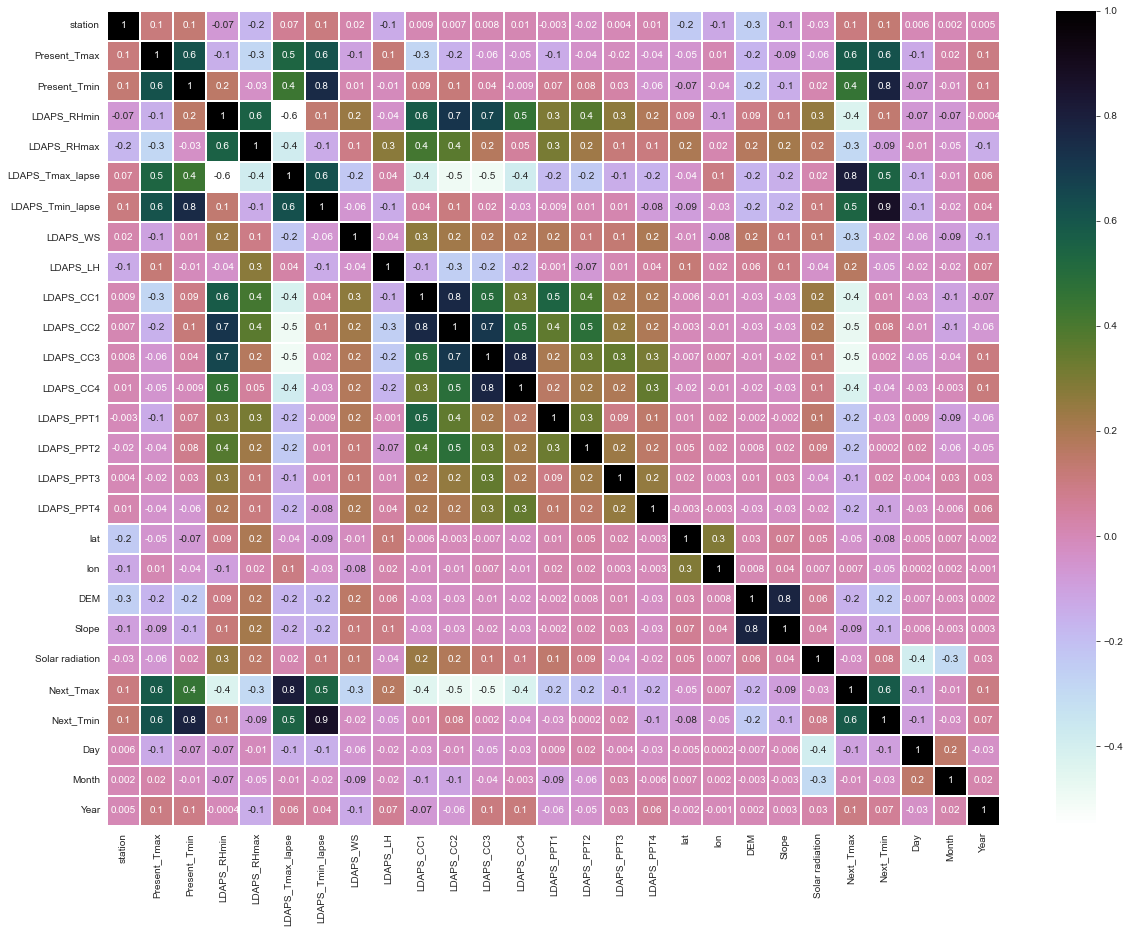

In [55]:
# Visualizing the correlation matrix 
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths=.1,fmt=".1g",annot=True,cmap="cubehelix_r")

The label Next_Tmax is highly positively correlated with LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Present_Tmax, Present_Tmin and Next_Tmin.

The label is negatively correlated with LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_RHmax, LDAPS_RHmin, and LDAPS_WS. 

The features lon and Solar radiations have very less correlation with the target Next_Tmin.

The label Next_Tmin is highly positively correlated with LDAPS_Tmin_lapse, Present_Tmin, LDAPS_Tmax_lapse, Present_Tmax and Next_Tmax.
The label is negatively correlated with DEM, Slope and Day.

In [56]:
#Separating features and label
x = new_df.drop("Next_Tmax",axis=1)
y =new_df["Next_Tmax"]

In [57]:
x.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax        -0.691582
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS            1.095290
LDAPS_LH            0.571067
LDAPS_CC1           0.593987
LDAPS_CC2           0.501474
LDAPS_CC3           0.709766
LDAPS_CC4           0.721344
LDAPS_PPT1          3.753955
LDAPS_PPT2          4.874124
LDAPS_PPT3          5.517553
LDAPS_PPT4          5.974954
lat                 0.106291
lon                -0.276193
DEM                 1.761452
Slope               1.592353
Solar radiation    -0.503706
Next_Tmin          -0.293914
Day                 0.252759
Month              -0.684769
Year                0.008778
dtype: float64

In [58]:
#Removing skewness using yeo-johnson method
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [59]:
x[skew] = scaler.fit_transform(x[skew].values)

In [60]:
x.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax        -0.100108
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS            0.006054
LDAPS_LH           -0.028792
LDAPS_CC1           0.062695
LDAPS_CC2           0.047328
LDAPS_CC3           0.092375
LDAPS_CC4           0.141116
LDAPS_PPT1          1.625143
LDAPS_PPT2          1.828579
LDAPS_PPT3          2.005782
LDAPS_PPT4          2.284866
lat                 0.106291
lon                -0.276193
DEM                 0.038646
Slope               0.233614
Solar radiation    -0.166195
Next_Tmin          -0.293914
Day                 0.252759
Month               0.039871
Year                0.008778
dtype: float64

The skewness has been removed from all the columns except LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT1. Lets remove the skewness from these columns using log transformation.

In [61]:
# Removing skewness usinf log transformation
x['LDAPS_PPT1'] = np.log1p(x['LDAPS_PPT1'])
x['LDAPS_PPT2'] = np.log1p(x['LDAPS_PPT2'])
x['LDAPS_PPT3'] = np.log1p(x['LDAPS_PPT3'])
x['LDAPS_PPT4'] = np.log1p(x['LDAPS_PPT4'])

In [62]:
x.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax        -0.100108
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS            0.006054
LDAPS_LH           -0.028792
LDAPS_CC1           0.062695
LDAPS_CC2           0.047328
LDAPS_CC3           0.092375
LDAPS_CC4           0.141116
LDAPS_PPT1          1.406289
LDAPS_PPT2          1.607900
LDAPS_PPT3          1.731420
LDAPS_PPT4          2.027675
lat                 0.106291
lon                -0.276193
DEM                 0.038646
Slope               0.233614
Solar radiation    -0.166195
Next_Tmin          -0.293914
Day                 0.252759
Month               0.039871
Year                0.008778
dtype: float64

 we Tried removing skewness from LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 using yeo-johnson and log transformation methods but the skewness has not been removed but it got reduced. Lets check the distribution afetr removing skewness

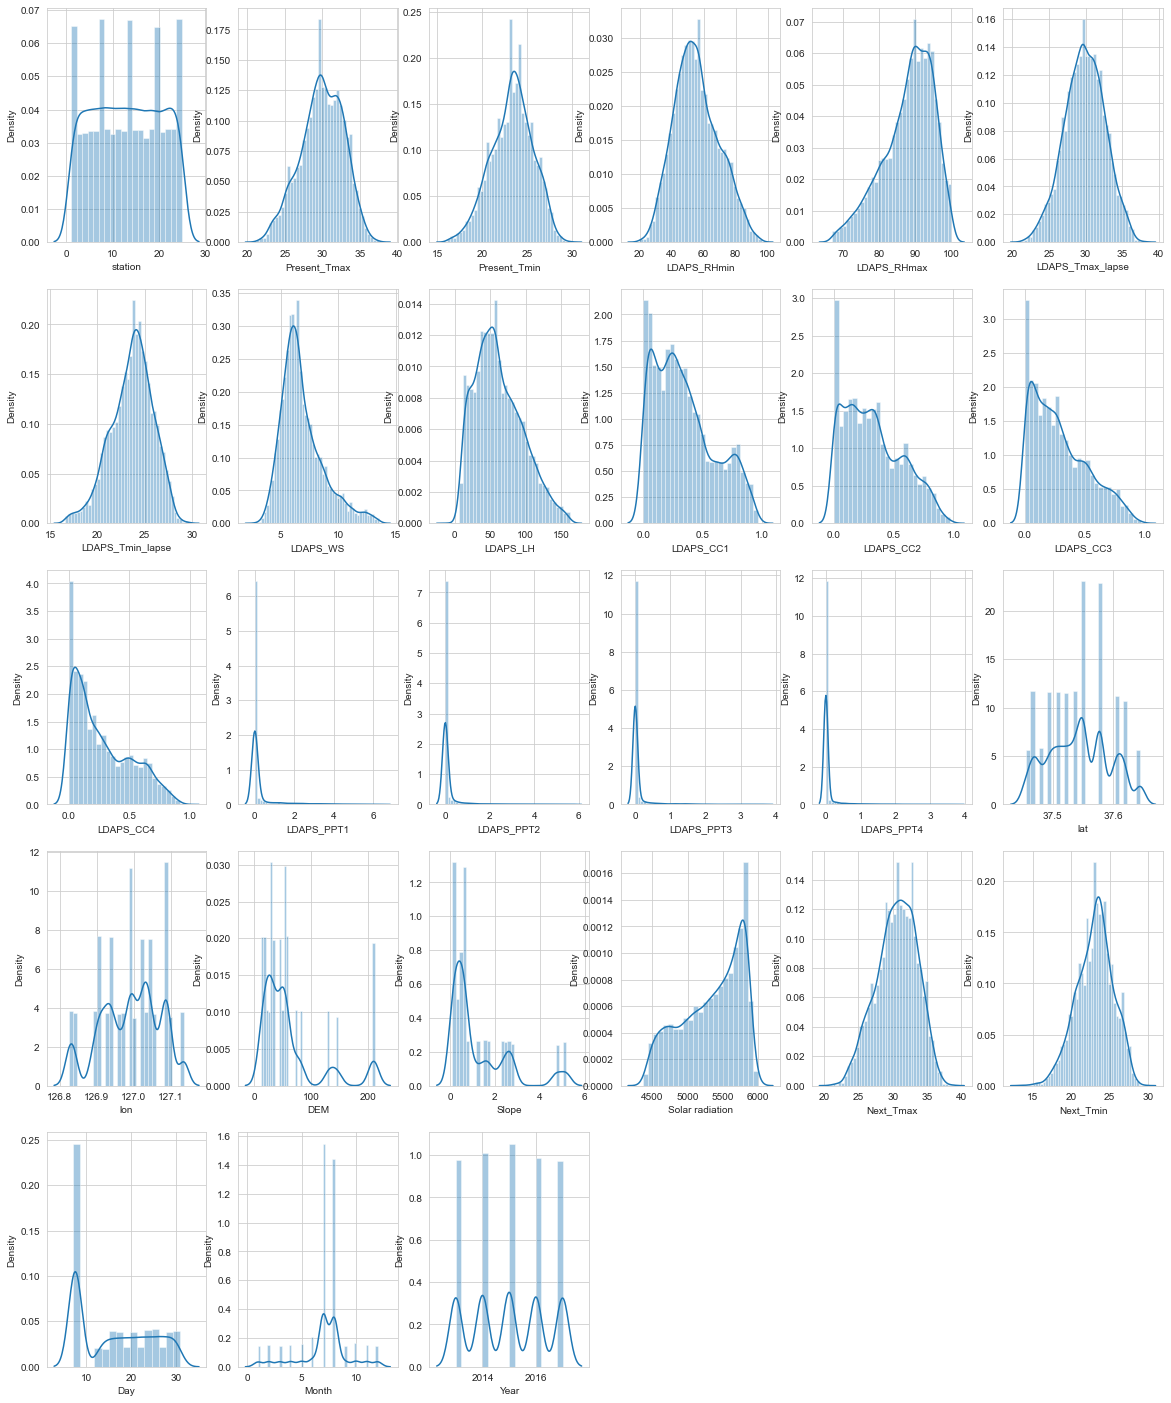

In [64]:
#lets see how our data point are distributed post removing skewness and outlier
plt.figure(figsize=(20,25),facecolor = 'w')
plotnumber = 1

for column in new_df:
    if plotnumber<=27:
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column)
    
    plotnumber+=1 
plt.show() 

it looks great our most of the feature is normally distributed

In [67]:
# Scaling the Input variables against which the target variable is Next_Tmax.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(x)
X

array([[-1.67197943e+00, -4.30760500e-01, -8.21754476e-01, ...,
         1.66083360e+00, -5.83608658e-01, -1.42511421e+00],
       [-1.53303338e+00,  6.88750284e-01, -7.35345553e-01, ...,
         1.66083360e+00, -5.83608658e-01, -1.42511421e+00],
       [-1.39408733e+00,  5.83796148e-01, -8.69703189e-04, ...,
         1.66083360e+00, -5.83608658e-01, -1.42511421e+00],
       ...,
       [ 1.38483365e+00, -2.31993495e+00, -2.67954633e+00, ...,
         1.66083360e+00,  3.57803702e-01,  1.43318382e+00],
       [ 1.52377970e+00, -2.31993495e+00, -2.42031956e+00, ...,
         1.66083360e+00,  3.57803702e-01,  1.43318382e+00],
       [ 1.66272575e+00, -2.35491966e+00, -2.54993295e+00, ...,
         1.66083360e+00,  3.57803702e-01,  1.43318382e+00]])

In [68]:
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year
0,-1.870386,-0.477862,-0.842317,0.257450,0.321681,-0.671335,-0.355943,0.182949,0.347058,-0.297276,...,-0.494638,0.0,-0.021362,1.838055,1.278606,2.046253,-0.814551,1.418711,-0.584958,-2.498002e-15
1,-1.657999,0.669700,-0.760771,-0.175200,0.231812,-0.028422,0.111464,-0.575810,-0.173203,-0.339245,...,-0.494638,0.0,0.502121,0.074532,-0.301079,1.507927,-0.289589,1.418711,-0.584958,-2.498002e-15
2,-1.464041,0.556593,-0.042436,-0.446007,-0.740226,0.059843,0.364580,-0.248684,-1.387505,-0.421455,...,-0.494638,0.0,0.840462,-0.349612,-0.952982,1.484230,0.309458,1.418711,-0.584958,-2.498002e-15
3,-1.282729,0.707657,0.001217,0.256334,1.412607,-0.081866,-0.214021,-0.608549,0.242176,-0.385412,...,-0.494638,0.0,0.373315,0.103548,1.214600,1.457248,0.487036,1.418711,-0.584958,-2.498002e-15
4,-1.110896,0.481826,-0.637279,0.110004,0.154765,-0.296938,-0.141667,-0.542466,1.304710,-0.737139,...,-0.494638,0.0,1.872291,-0.274607,-0.319165,1.467822,-0.289589,1.418711,-0.584958,-2.498002e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,1.076724,-2.176437,-2.202201,-2.637183,-1.353693,-0.764601,-2.125491,0.054030,-2.021149,-1.361438,...,-0.494638,0.0,0.605694,-0.711974,-0.185749,-1.666893,-2.078242,1.418711,0.355803,2.553513e-15
6903,1.194731,-2.335335,-2.340557,-2.068402,-0.774942,-1.155971,-2.276417,-0.517149,0.685762,-1.268093,...,-0.494638,0.0,1.210462,-1.001965,-1.455411,-1.682054,-2.272976,1.418711,0.355803,2.553513e-15
6904,1.311378,-2.122485,-2.442635,-2.414146,-1.296307,-1.279288,-1.973907,-0.241311,0.418867,-1.524861,...,-0.494638,0.0,-1.248124,-1.587983,-1.361434,-1.680453,-1.944860,1.418711,0.355803,2.553513e-15
6905,1.426737,-2.122485,-2.237031,-2.709668,-1.441317,-1.048746,-1.987657,0.016666,-0.326390,-1.482393,...,-0.494638,0.0,-1.032425,-1.405820,-1.103587,-1.685681,-1.704589,1.418711,0.355803,2.553513e-15


In [69]:
#Checking for Multicolinearity
# Finding variance inflation factor in each scaled column 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.213665,station
1,2.887412,Present_Tmax
2,3.290936,Present_Tmin
3,5.627430,LDAPS_RHmin
4,2.446117,LDAPS_RHmax
5,6.532795,LDAPS_Tmax_lapse
6,8.097134,LDAPS_Tmin_lapse
7,1.188171,LDAPS_WS
8,1.488145,LDAPS_LH
9,4.839253,LDAPS_CC1


 we are getting VIF values less than 10 in all the columns and so there is no multicolinearity problem.

# Model Building

In [80]:
# finding Best Random State
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.9012833575795117 at Random_state 34


In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)

In [86]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# RandomForestRegressor

In [87]:
# Checking R2 score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
print("R2_Score:",r2_score(y_test,predRFR))
print("MAE:",metrics.mean_absolute_error(y_test,predRFR))
print("MSE:",metrics.mean_squared_error(y_test,predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.9041482784585273
MAE: 0.6869164967364338
MSE: 0.8277201924552434
RMSE: 0.9097912906019948


# DecisionTreeRegressor

In [88]:
# Checking R2 score for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR = DTR.predict(x_test)
print("R2_Score:",r2_score(y_test,predDTR))
print("MAE:",metrics.mean_absolute_error(y_test,predDTR))
print("MSE:",metrics.mean_squared_error(y_test,predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.7626962306766181
MAE: 1.0370715486678
MSE: 2.0492185059995793
RMSE: 1.4315091707703376


# KNeighbors Regressor

In [89]:
# Checking R2 score for KNN Regressor
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("R2_Score:",r2_score(y_test,predknn))
print("MAE:",metrics.mean_absolute_error(y_test,predknn))
print("MSE:",metrics.mean_squared_error(y_test,predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 0.8032183139405704
MAE: 0.9985697822363974
MSE: 1.6992931627868997
RMSE: 1.3035693931612922


# GradientBoosting Regressor

In [90]:
# Checking R2 score for KNN Regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print("R2_Score:",r2_score(y_test,predGB))
print("MAE:",metrics.mean_absolute_error(y_test,predGB))
print("MSE:",metrics.mean_squared_error(y_test,predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 0.8602849750884639
MAE: 0.84474001715906
MSE: 1.206498385724132
RMSE: 1.0984072039658754


# BaggingRegressor

In [91]:
# Checking R2 score for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)
predBR = BR.predict(x_test)
print("R2_Score:",r2_score(y_test,predBR))
print("MAE:",metrics.mean_absolute_error(y_test,predBR))
print("MSE:",metrics.mean_squared_error(y_test,predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.8871692819599016
MAE: 0.7584262103138363
MSE: 0.9743410149457253
RMSE: 0.9870871364503365


# Checking the cross validation score

In [92]:
from sklearn.model_selection import cross_val_score

In [99]:
# Checking cv score for RandomForestRegressor
print(cross_val_score(RFR,X,y,cv=5).mean())

0.6807460504075712


In [100]:
# Checking cv score for DecisionTreeRegressor
print(cross_val_score(DTR,X,y,cv=5).mean())

0.4712197262975364


In [101]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,X,y,cv=5).mean())

0.5449065966479217


In [102]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,X,y,cv=5).mean())

0.69852238244288


In [103]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,X,y,cv=5).mean())

0.6540931771170249


From the above observation, the difference between R2score and the cross validation score we conclude that RandomForestRegressor as our best fitting model. Lets increase the accuracy of the model by using hyper parameter tuning.

# Hyper parameter tuning

In [104]:
from sklearn.model_selection import GridSearchCV


In [105]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

grd = GridSearchCV(RandomForestRegressor(),param_grid =grid)
grd.fit(x_train,y_train)
grd.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 18}

In [108]:
final_model1 = RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=500,random_state=18)
final_model1.fit(x_train, y_train)
pred = final_model1.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.9097912906019948
R2_Score: 84.04872335011079


we got r2 score of 84% which is very good score hence we save our model

# Saving the model

In [109]:
import pickle
filename = 'Temprature_nextday_max.pkl'
pickle.dump(final_model1,open(filename,'wb'))#saved model

In [110]:
import pickle
loaded_model=pickle.load(open('Temprature_nextday_max.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

84.04872335011079


# Prediction for Next_Tmin

In [114]:
#Separating features and label
x1 = new_df.drop("Next_Tmin",axis=1)
y1 = new_df["Next_Tmin"]

In [115]:
x1.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax        -0.691582
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS            1.095290
LDAPS_LH            0.571067
LDAPS_CC1           0.593987
LDAPS_CC2           0.501474
LDAPS_CC3           0.709766
LDAPS_CC4           0.721344
LDAPS_PPT1          3.753955
LDAPS_PPT2          4.874124
LDAPS_PPT3          5.517553
LDAPS_PPT4          5.974954
lat                 0.106291
lon                -0.276193
DEM                 1.761452
Slope               1.592353
Solar radiation    -0.503706
Next_Tmax          -0.270276
Day                 0.252759
Month              -0.684769
Year                0.008778
dtype: float64

In [118]:
#Removing skewness using yeo-johnson method
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_WS','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [120]:
x1[skew] = scaler.fit_transform(x1[skew].values)

In [121]:
x1.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax         0.010797
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS           -0.038047
LDAPS_LH           -0.020959
LDAPS_CC1           0.003413
LDAPS_CC2           0.005630
LDAPS_CC3           0.008206
LDAPS_CC4           0.005120
LDAPS_PPT1          0.861374
LDAPS_PPT2          1.036177
LDAPS_PPT3          1.123216
LDAPS_PPT4          1.457476
lat                 0.106291
lon                -0.276193
DEM                 0.010026
Slope              -0.009706
Solar radiation    -0.008979
Next_Tmax          -0.270276
Day                 0.252759
Month               0.057659
Year                0.008778
dtype: float64

In [122]:
# Removing skewness usinf log transformation
x1['LDAPS_PPT1'] = np.log1p(x1['LDAPS_PPT1'])
x1['LDAPS_PPT2'] = np.log1p(x1['LDAPS_PPT2'])
x1['LDAPS_PPT3'] = np.log1p(x1['LDAPS_PPT3'])
x1['LDAPS_PPT4'] = np.log1p(x1['LDAPS_PPT4'])

In [123]:
x1.skew()

station             0.002230
Present_Tmax       -0.274967
Present_Tmin       -0.232563
LDAPS_RHmin         0.306629
LDAPS_RHmax         0.010797
LDAPS_Tmax_lapse   -0.107855
LDAPS_Tmin_lapse   -0.400578
LDAPS_WS           -0.038047
LDAPS_LH           -0.020959
LDAPS_CC1           0.003413
LDAPS_CC2           0.005630
LDAPS_CC3           0.008206
LDAPS_CC4           0.005120
LDAPS_PPT1          0.783808
LDAPS_PPT2          0.992499
LDAPS_PPT3          1.092650
LDAPS_PPT4          1.443158
lat                 0.106291
lon                -0.276193
DEM                 0.010026
Slope              -0.009706
Solar radiation    -0.008979
Next_Tmax          -0.270276
Day                 0.252759
Month               0.057659
Year                0.008778
dtype: float64

Tried removing skewness from LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 using yeo-johnson and log transformation methods but the skewness has not been removed but it got reduced.

In [125]:
# Scaling the Input variables against which the target variable is Next_Tmin.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X1 = sc.fit_transform(x1)
X1

array([[-1.67197943e+00, -4.30760500e-01, -8.21754476e-01, ...,
         1.66083360e+00, -5.84793557e-01, -1.42511421e+00],
       [-1.53303338e+00,  6.88750284e-01, -7.35345553e-01, ...,
         1.66083360e+00, -5.84793557e-01, -1.42511421e+00],
       [-1.39408733e+00,  5.83796148e-01, -8.69703189e-04, ...,
         1.66083360e+00, -5.84793557e-01, -1.42511421e+00],
       ...,
       [ 1.38483365e+00, -2.31993495e+00, -2.67954633e+00, ...,
         1.66083360e+00,  3.56050452e-01,  1.43318382e+00],
       [ 1.52377970e+00, -2.31993495e+00, -2.42031956e+00, ...,
         1.66083360e+00,  3.56050452e-01,  1.43318382e+00],
       [ 1.66272575e+00, -2.35491966e+00, -2.54993295e+00, ...,
         1.66083360e+00,  3.56050452e-01,  1.43318382e+00]])

In [126]:
X1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
X1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Day,Month,Year
0,-1.870386,-0.477862,-0.842317,0.257450,0.319715,-0.671335,-0.355943,0.182858,0.346987,-0.294665,...,-0.515425,0.0,-0.021362,1.837464,1.266146,2.095893,-0.541093,1.418711,-0.584814,-2.498002e-15
1,-1.657999,0.669700,-0.760771,-0.175200,0.229707,-0.028422,0.111464,-0.575868,-0.173283,-0.336729,...,-0.515425,0.0,0.502121,0.074805,-0.282882,1.529864,-0.071349,1.418711,-0.584814,-2.498002e-15
2,-1.464041,0.556593,-0.042436,-0.446007,-0.741075,0.059843,0.364580,-0.248772,-1.387427,-0.419154,...,-0.515425,0.0,0.840462,-0.349379,-0.952620,1.505076,0.137166,1.418711,-0.584814,-2.498002e-15
3,-1.282729,0.707657,0.001217,0.256334,1.414839,-0.081866,-0.214021,-0.608602,0.242099,-0.383011,...,-0.515425,0.0,0.373315,0.103820,1.204976,1.476866,0.350009,1.418711,-0.584814,-2.498002e-15
4,-1.110896,0.481826,-0.637279,0.110004,0.152575,-0.296938,-0.141667,-0.542528,1.304772,-0.736007,...,-0.515425,0.0,1.872291,-0.274359,-0.301243,1.487919,0.172339,1.418711,-0.584814,-2.498002e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,1.076724,-2.176437,-2.202201,-2.637183,-1.351791,-0.764601,-2.125491,0.053935,-2.020924,-1.363932,...,-0.515425,0.0,0.605694,-0.711862,-0.166138,-1.639578,-1.018407,1.418711,0.356020,2.553513e-15
6903,1.194731,-2.335335,-2.340557,-2.068402,-0.775668,-1.155971,-2.276417,-0.517214,0.685724,-1.269949,...,-0.515425,0.0,1.210462,-1.001992,-1.477834,-1.654031,-0.893744,1.418711,0.356020,2.553513e-15
6904,1.311378,-2.122485,-2.442635,-2.414146,-1.294710,-1.279288,-1.973907,-0.241399,0.418802,-1.528544,...,-0.515425,0.0,-1.248124,-1.588388,-1.379092,-1.652505,-0.798997,1.418711,0.356020,2.553513e-15
6905,1.426737,-2.122485,-2.237031,-2.709668,-1.438933,-1.048746,-1.987657,0.016570,-0.326462,-1.485758,...,-0.515425,0.0,-1.032425,-1.406095,-1.109334,-1.657489,-0.703178,1.418711,0.356020,2.553513e-15


# Model building

In [127]:
#Finding the best random state

maxAccu=0
maxRS=0
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X1,y1,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc=r2_score(Y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9097168323600823  on Random_state  83


In [128]:
#Creating new train test split
X_train,X_test,Y_train,Y_test=train_test_split(X1,y1,test_size=.30,random_state=maxRS)

# RandomForestRegressor

In [129]:
# Checking R2 score for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)
predRFR = RFR.predict(X_test)
print("R2_score:",r2_score(Y_test,predRFR))
print("MAE:",metrics.mean_absolute_error(Y_test,predRFR))
print("MSE:",metrics.mean_squared_error(Y_test,predRFR))
print("RSME:",np.sqrt(metrics.mean_squared_error(Y_test,predRFR)))

R2_score: 0.9106599661206977
MAE: 0.5537204321239172
MSE: 0.5273476122056951
RSME: 0.7261870366549482


# DecisionTreeRegressor

In [130]:
# Checking R2 score for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
predDTR = DTR.predict(X_test)
print("R2_score:",r2_score(Y_test,predDTR))
print("MAE:",metrics.mean_absolute_error(Y_test,predDTR))
print("MSE:",metrics.mean_squared_error(Y_test,predDTR))
print("RSME:",np.sqrt(metrics.mean_squared_error(Y_test,predDTR)))

R2_score: 0.7902013996436719
MAE: 0.825265055256597
MSE: 1.2383786544280462
RSME: 1.1128246287839096


# KNeighbors Regressor

In [131]:
# Checking R2 score for KNeighbors Regressor
knn = KNN()
knn.fit(X_train,Y_train)
predknn = knn.predict(X_test)
print("R2_score:",r2_score(Y_test,predknn))
print("MAE:",metrics.mean_absolute_error(Y_test,predknn))
print("MSE:",metrics.mean_squared_error(Y_test,predknn))
print("RSME:",np.sqrt(metrics.mean_squared_error(Y_test,predknn)))


R2_score: 0.8621839769268107
MAE: 0.6906002045095129
MSE: 0.813486939007851
RSME: 0.9019351079805303


# GradientBoostingRegressor

In [132]:
# Checking R2 score for GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train,Y_train)
predGB = GB.predict(X_test)
print("R2_score:",r2_score(Y_test,predGB))
print("MAE:",metrics.mean_absolute_error(Y_test,predGB))
print("MSE:",metrics.mean_squared_error(Y_test,predGB))
print("RSME:",np.sqrt(metrics.mean_squared_error(Y_test,predGB)))

R2_score: 0.8943466131396414
MAE: 0.615713430282817
MSE: 0.6236404763124067
RSME: 0.7897091086674933


# BaggingRegressor

In [133]:
# Checking R2 score for BaggingRegressor
BR = BaggingRegressor()
BR.fit(X_train,Y_train)
predBR = BR.predict(X_test)
print("R2_score:",r2_score(Y_test,predBR))
print("MAE:",metrics.mean_absolute_error(Y_test,predBR))
print("MSE:",metrics.mean_squared_error(Y_test,predBR))
print("RSME:",np.sqrt(metrics.mean_squared_error(Y_test,predBR)))


R2_score: 0.8970099528709009
MAE: 0.597684354085585
MSE: 0.6079195750905679
RSME: 0.7796919744941383


# Checking the cross validation score

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
# Checking cv score for RandomForestRegressor
print(cross_val_score(RFR,X1,y1,cv=5).mean())

0.7853189514623992


In [136]:
# Checking cv score for DecisionTreeRegressor
print(cross_val_score(DTR,X1,y1,cv=5).mean())

0.5821133979434798


In [137]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,X1,y1,cv=5).mean())

0.5914868807241451


In [138]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,X1,y1,cv=5).mean())

0.79567786706581


In [139]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,X1,y1,cv=5).mean())

0.7696187257439995


From the differences between the R2 score and Cross Validation Score we can conclude that RANDOMFOREST Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

# Hyper parameter tuning

In [141]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}

grd = GridSearchCV(RandomForestRegressor(),param_grid =grid)
grd.fit(X_train,Y_train)
grd.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}

In [142]:
final_model2 = RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=300,random_state=18)
final_model2.fit(X_train, Y_train)
pred = final_model2.predict(X_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(Y_test, predRFR)))
print('R2_Score:',r2_score(Y_test,pred)*100)

RMSE value: 0.7261870366549482
R2_Score: 85.66158147630162


WE GOT 85.6% of r2 score after tuning which is good now we will save the model.

# Saving the model

In [143]:
import pickle
filename = 'Temprature_nextday_Tmin.pkl'
pickle.dump(final_model2,open(filename,'wb'))#saved model

In [144]:
import pickle
loaded_model=pickle.load(open('Temprature_nextday_Tmin.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result*100)

85.66158147630162
